In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function, absolute_import, division

In [3]:
import tensorflow as tf
print(tf.__version__)
tf.test.is_gpu_available()

1.13.1


True

In [4]:
import train.qvaluetrainer as qvt

In [5]:
latest_model=!gsutil ls gs://gomoku-data/model5/export/exporter | grep -v temp | sort | tail -1
latest_model = latest_model[0]
latest_model

'gs://gomoku-data/model5/export/exporter/1555217844/'

In [6]:
estimator = tf.contrib.predictor.from_saved_model(latest_model)

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from gs://gomoku-data/model5/export/exporter/1555217844/variables/variables


In [1]:
from wgomoku import (
    GomokuBoard, HeuristicGomokuPolicy, Heuristics, GomokuTools as gt, data_from_game)
stones=gt.string_to_stones(
    'e10g8g5f5f6e7f7f8e8g9h10d9g10f10h8h9i9g7e9j8h11i12e11e12g11f11f12e13g13h14i10g14j9k8i8k4i7')
heuristics = Heuristics(kappa=3.0)

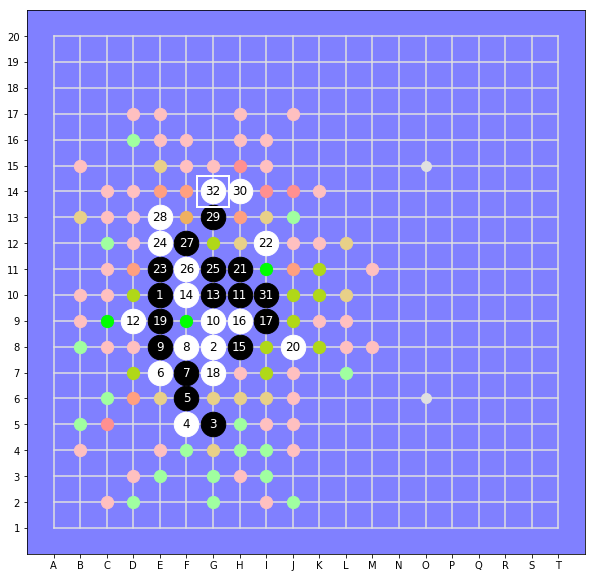

In [4]:
board = GomokuBoard(heuristics=heuristics, N=20, stones=stones, disp_width=10)
policy = HeuristicGomokuPolicy(style=2, topn=5, bias=.5)
board.undo(False).undo(False).undo(False).undo(False).undo()
board.display('current')

In [11]:
from wgomoku import create_sample, to_matrix12
s = create_sample(board.stones, 20, 0)
s.shape

(22, 22, 2)

In [12]:
to_matrix12(s)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0,

In [13]:
import numpy as np
sample={'state': np.transpose([s.flatten()])}

In [14]:
q = estimator(sample)
q = q['output'][0]
q = np.rollaxis(q, 2, 0)

NameError: name 'estimator' is not defined

In [9]:
unwrapped = q.astype(int)[0][1:-1].T[1:-1].T
unwrapped

NameError: name 'q' is not defined

In [14]:
from QFunction import heuristic_QF, value_after, least_significant_move
q = heuristic_QF(board, policy)

In [15]:
q[0].astype(int)

array([[-73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73,
        -73, -73, -73, -73, -73, -73, -73],
       [-73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73,
        -73, -73, -73, -73, -73, -73, -73],
       [-73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73,
        -73, -73, -73, -73, -73, -73, -73],
       [-73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73,
        -73, -73, -73, -73, -73, -73, -73],
       [-73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73,
        -73, -73, -73, -73, -73, -73, -73],
       [-73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73, -73,
        -73, -73, -73, -73, -73, -73, -73],
       [-73, -73, -73, -73, -40, -44, -73, -73, -73, -73, -73, -73, -73,
        -73, -73, -73, -73, -73, -73, -73],
       [-73, -73, -73, -73, -73, -33, -73, -46, -73, -73, -73, -73, -73,
        -73, -73, -73, -73, -73, -73, -73],
       [-73, -73, -73, -73, -73, -73, -74, -73, -73, -73, -73, -

In [16]:
board.get_value()

-45.65479016424263

In [17]:
value_after(board, least_significant_move(board), policy)

-73.93027488424167

In [18]:
27**3

19683